<div align='center'>
  Pontifícia Universidade Católica de Minas Gerais</br>
  Programa de Pós-Graduação em Ciência de Dados e Big Data</br>
  Machine Learning
</div>
</br>

<div align='center'>
  <h1><b>Exercício Prático I - Preparação de Dados</b></h1>
</div>
</br>

<div align='right'>
  Aluno: Marco Túlio Barbosa Andrade</br>
  Professor: Cristiano Rodrigues de Carvalho
</div>
</br>

<div align='center'>
  Belo Horizonte</br>
  2022
</div>

## Importação das bibliotecas

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importação dos dados

In [4]:
df = pd.read_excel('automoveis.xlsx', index_col=None, header=0)

## Análise inicial

In [5]:
# Cabeçalho
df.head(5)

,Fabricante,Combustível,Portas,Estilo Chassis,Tração,Comprimento,Largura,Altura,Tipo de motor,Número de cilindros,Tamanho do motor,Tipo de injeção,Potência (HP),Pico RPM,Preço
0,alfa-romeo,gas,2.0,conversível,traseira,"168,80","64,10","48,80",dohc,4,"130,00",mpfi,"111,00","5000,00","13495,00"
1,alfa-romeo,gas,2.0,conversível,traseira,"168,80","64,10","48,80",dohc,4,"130,00",mpfi,"111,00","5000,00","16500,00"
2,alfa-romeo,gas,2.0,hatch,traseira,"171,20","65,50","52,40",ohcv,6,"152,00",mpfi,"154,00","5000,00","16500,00"
3,audi,gas,4.0,sedan,dianteira,"176,60","66,20","54,30",ohc,4,"109,00",mpfi,"102,00","5500,00","13950,00"
4,audi,gas,4.0,sedan,4x4,"176,60","66,40","54,30",ohc,5,"136,00",mpfi,"115,00","5500,00","17450,00"


In [6]:
# Rodapé
df.tail(5)

,Fabricante,Combustível,Portas,Estilo Chassis,Tração,Comprimento,Largura,Altura,Tipo de motor,Número de cilindros,Tamanho do motor,Tipo de injeção,Potência (HP),Pico RPM,Preço
200,volvo,gas,4.0,sedan,traseira,"188,80","68,90","55,50",ohcv,6,"173,00",mpfi,"134,00","5500,00","21485,00"
201,volvo,diesel,4.0,sedan,traseira,"188,80","68,90","55,50",ohc,6,"145,00",idi,"106,00","4800,00","22470,00"
202,volvo,gas,4.0,sedan,traseira,"188,80","68,90","55,50",ohc,4,"141,00",mpfi,"114,00","5400,00","22625,00"
203,NaN,gas,4.0,sedan,traseira,"176,80","64,80","54,30",ohc,6,"164,00",mpfi,"121,00","4250,00","21105,00"
204,NaN,gas,2.0,hatch,traseira,"169,00","65,70","49,60",rotor,2,"70,00",4bbl,"101,00","6000,00","10945,00"


In [7]:
# Número de linhas e colunas
df.shape

(205, 15)

In [8]:
# Informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Fabricante           203 non-null    object 
 1   Combustível          200 non-null    object 
 2   Portas               203 non-null    float64
 3   Estilo Chassis       205 non-null    object 
 4   Tração               205 non-null    object 
 5   Comprimento          205 non-null    object 
 6   Largura              205 non-null    object 
 7   Altura               205 non-null    object 
 8   Tipo de motor        205 non-null    object 
 9   Número de cilindros  205 non-null    object 
 10  Tamanho do motor     205 non-null    object 
 11  Tipo de injeção      205 non-null    object 
 12  Potência (HP)        205 non-null    object 
 13  Pico RPM             205 non-null    object 
 14  Preço                205 non-null    object 
dtypes: float64(1), object(14)
memory usage: 

In [9]:
# Dados faltantes
df.isnull().sum()

Fabricante             2
Combustível            5
Portas                 2
Estilo Chassis         0
Tração                 0
Comprimento            0
Largura                0
Altura                 0
Tipo de motor          0
Número de cilindros    0
Tamanho do motor       0
Tipo de injeção        0
Potência (HP)          0
Pico RPM               0
Preço                  0
dtype: int64

## Estatística descritiva

In [10]:
# Campos numéricos
df.describe()

,Portas
count,203.000000
mean,3.123153
std,0.994841
min,2.000000
25%,2.000000
50%,4.000000
75%,4.000000
max,4.000000


In [11]:
# Campos não-numérico
df.select_dtypes(include='object').describe()

,Fabricante,Combustível,Estilo Chassis,Tração,Comprimento,Largura,Altura,Tipo de motor,Número de cilindros,Tamanho do motor,Tipo de injeção,Potência (HP),Pico RPM,Preço
count,203,200,205,205,205,205,205,205,205,205,205,205,205,205
unique,22,2,5,3,75,44,49,7,7,44,8,60,25,187
top,toyota,gas,sedan,dianteira,"157,30","63,80","50,80",ohc,4,"122,00",mpfi,"68,00","5500,00","13207,13"
freq,32,180,96,120,15,24,14,148,159,15,94,19,37,4


## Campo Comprimento

- Sem dados omissos ou inconsistentes
- Realizada transformação de tipo para float

In [12]:
# Verificação dos dados
df['Comprimento'].unique()

array(['168,80', '171,20', '176,60', '177,30', '192,70', '178,20',
       '176,80', '189,00', '193,80', '197,00', '141,10', '155,90',
       '158,80', '157,30', '174,60', '173,20', '144,60', '150,00',
       '163,40', '157,10', '167,50', '175,40', '169,10', '170,70',
       '172,60', '199,60', '191,70', '159,10', '166,80', '169,00',
       '177,80', '175,00', '190,90', '187,50', '202,60', '180,30',
       '208,10', '199,20', '178,40', '173,00', '172,40', '165,30',
       '170,20', '165,60', '162,40', '173,40', '181,70', '184,60',
       '178,50', '186,70', '198,90', '167,30', '168,90', '175,70',
       '181,50', '186,60', '156,90', '157,90', '172,00', '173,50',
       '173,60', '158,70', '169,70', '166,30', '168,70', '176,20',
       '175,60', '183,50', '187,80', '171,70', '159,30', '165,70',
       '180,20', '183,10', '188,80'], dtype=object)

In [13]:
# Transformação dos dados em float
df['Comprimento'] = df['Comprimento'].astype('string')
df['Comprimento'] = df['Comprimento'].str.replace(',', '.')
df['Comprimento'] = df['Comprimento'].astype('float')

In [14]:
# Verificação dos dados
df['Comprimento'].unique()

array([168.8, 171.2, 176.6, 177.3, 192.7, 178.2, 176.8, 189. , 193.8,
       197. , 141.1, 155.9, 158.8, 157.3, 174.6, 173.2, 144.6, 150. ,
       163.4, 157.1, 167.5, 175.4, 169.1, 170.7, 172.6, 199.6, 191.7,
       159.1, 166.8, 169. , 177.8, 175. , 190.9, 187.5, 202.6, 180.3,
       208.1, 199.2, 178.4, 173. , 172.4, 165.3, 170.2, 165.6, 162.4,
       173.4, 181.7, 184.6, 178.5, 186.7, 198.9, 167.3, 168.9, 175.7,
       181.5, 186.6, 156.9, 157.9, 172. , 173.5, 173.6, 158.7, 169.7,
       166.3, 168.7, 176.2, 175.6, 183.5, 187.8, 171.7, 159.3, 165.7,
       180.2, 183.1, 188.8])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f65ebf6b5d0>]],
      dtype=object)

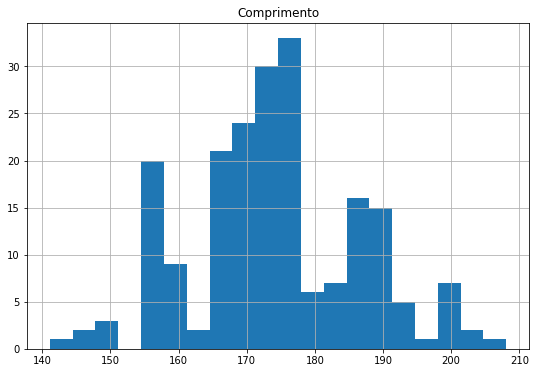

In [15]:
# Visualização do histograma
df.hist(column='Comprimento', figsize=(9,6), bins=20)

## Campo Largura

- Sem dados omissos ou inconsistentes
- Realizada transformação de tipo para float

In [16]:
# Verificação dos dados
df['Largura'].unique()

array(['64,10', '65,50', '66,20', '66,40', '66,30', '71,40', '67,90',
       '64,80', '66,90', '70,90', '60,30', '63,60', '63,80', '64,60',
       '63,90', '64,00', '65,20', '62,50', '66,00', '61,80', '69,60',
       '70,60', '64,20', '65,70', '66,50', '66,10', '70,30', '71,70',
       '70,50', '72,00', '68,00', '64,40', '65,40', '68,40', '68,30',
       '65,00', '72,30', '66,60', '63,40', '65,60', '67,70', '67,20',
       '68,90', '68,80'], dtype=object)

In [17]:
# Conversão dos dados em float
df['Largura'] = df['Largura'].astype('string')
df['Largura'] = df['Largura'].str.replace(',', '.')
df['Largura'] = df['Largura'].astype('float')

In [18]:
# Verificação dos dados
df['Largura'].unique()

array([64.1, 65.5, 66.2, 66.4, 66.3, 71.4, 67.9, 64.8, 66.9, 70.9, 60.3,
       63.6, 63.8, 64.6, 63.9, 64. , 65.2, 62.5, 66. , 61.8, 69.6, 70.6,
       64.2, 65.7, 66.5, 66.1, 70.3, 71.7, 70.5, 72. , 68. , 64.4, 65.4,
       68.4, 68.3, 65. , 72.3, 66.6, 63.4, 65.6, 67.7, 67.2, 68.9, 68.8])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f65eb8df990>]],
      dtype=object)

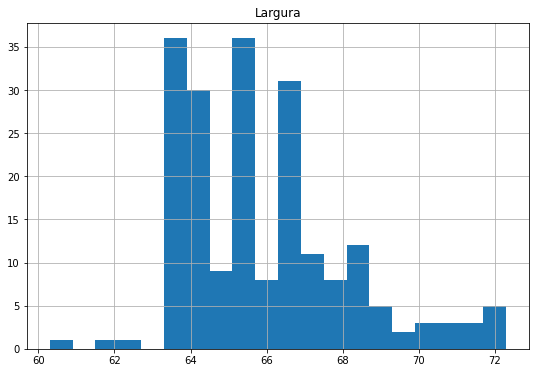

In [19]:
# Visualização do histograma
df.hist(column='Largura', figsize=(9,6), bins=20)

## Campo Altura

- Sem dados omissos ou inconsistentes
- Realizada transformação de tipo para float

In [20]:
# Verificação dos dados
df['Altura'].unique()

array(['48,80', '52,40', '54,30', '53,10', '55,70', '55,90', '52,00',
       '53,70', '56,30', '53,20', '50,80', '50,60', '59,80', '50,20',
       '52,60', '54,50', '58,30', '53,30', '54,10', '51,00', '53,50',
       '51,40', '52,80', '47,80', '49,60', '55,50', '54,40', '56,50',
       '58,70', '54,90', '56,70', '55,40', '54,80', '49,40', '51,60',
       '54,70', '55,10', '56,10', '49,70', '56,00', '50,50', '55,20',
       '52,50', '53,00', '59,10', '53,90', '55,60', '56,20', '57,50'],
      dtype=object)

In [21]:
# Transformação dos dados em float
df['Altura'] = df['Altura'].astype('string')
df['Altura'] = df['Altura'].str.replace(',', '.')
df['Altura'] = df['Altura'].astype('float')

In [22]:
# Verificação dos dados
df['Altura'].unique()

array([48.8, 52.4, 54.3, 53.1, 55.7, 55.9, 52. , 53.7, 56.3, 53.2, 50.8,
       50.6, 59.8, 50.2, 52.6, 54.5, 58.3, 53.3, 54.1, 51. , 53.5, 51.4,
       52.8, 47.8, 49.6, 55.5, 54.4, 56.5, 58.7, 54.9, 56.7, 55.4, 54.8,
       49.4, 51.6, 54.7, 55.1, 56.1, 49.7, 56. , 50.5, 55.2, 52.5, 53. ,
       59.1, 53.9, 55.6, 56.2, 57.5])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f65eb873790>]],
      dtype=object)

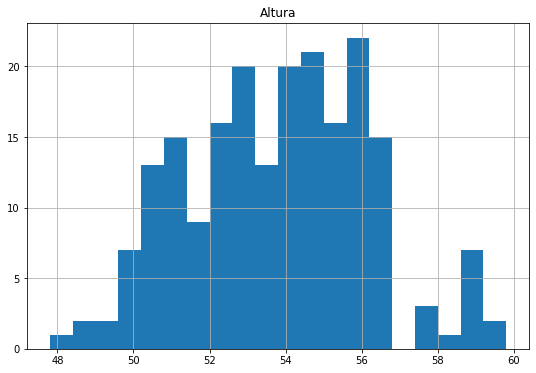

In [23]:
# Visualização do histograma
df.hist(column='Altura', figsize=(9,6), bins=20)

## Campo Fabricante

- Com dados omissos
- Realizada a busca de registros com dados similares (exceto valor) para imputação de valores:
  - Registro 203: não foi encontrado registro com os mesmos dados, mas 'bmw' é o valor mais provável
  - Registro 204: foi encontrado registro com os mesmos dados, sendo 'mazda' o valor mais provável

In [24]:
# Verificação dos dados
df['Fabricante'].unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo', nan],
      dtype=object)

In [25]:
# Visualização dos dados faltantes
df[df['Fabricante'].isnull()]

,Fabricante,Combustível,Portas,Estilo Chassis,Tração,Comprimento,Largura,Altura,Tipo de motor,Número de cilindros,Tamanho do motor,Tipo de injeção,Potência (HP),Pico RPM,Preço
203,NaN,gas,4.0,sedan,traseira,176.8,64.8,54.3,ohc,6,"164,00",mpfi,"121,00","4250,00","21105,00"
204,NaN,gas,2.0,hatch,traseira,169.0,65.7,49.6,rotor,2,"70,00",4bbl,"101,00","6000,00","10945,00"


In [26]:
# Busca de registro com dados similares para imputação de valor
df[(df['Comprimento'] == 176.80) & (df['Largura'] == 64.80) & (df['Altura'] == 54.30)]

,Fabricante,Combustível,Portas,Estilo Chassis,Tração,Comprimento,Largura,Altura,Tipo de motor,Número de cilindros,Tamanho do motor,Tipo de injeção,Potência (HP),Pico RPM,Preço
10,bmw,gas,2.0,sedan,traseira,176.8,64.8,54.3,ohc,4,"108,00",mpfi,"101,00",580000,"16430,00"
11,bmw,gas,4.0,sedan,traseira,176.8,64.8,54.3,ohc,4,"108,00",mpfi,"101,00",580000,"16925,00"
12,bmw,gas,2.0,sedan,traseira,176.8,64.8,54.3,ohc,6,"164,00",mpfi,"121,00","4250,00","20970,00"
203,NaN,gas,4.0,sedan,traseira,176.8,64.8,54.3,ohc,6,"164,00",mpfi,"121,00","4250,00","21105,00"


In [27]:
# Imputação de valor
df.iloc[203, 0] = 'bmw'

In [28]:
# Busca de registro com dados similares para imputação de valor
df[(df['Comprimento'] == 169.00) & (df['Largura'] == 65.70) & (df['Altura'] == 49.60)]

,Fabricante,Combustível,Portas,Estilo Chassis,Tração,Comprimento,Largura,Altura,Tipo de motor,Número de cilindros,Tamanho do motor,Tipo de injeção,Potência (HP),Pico RPM,Preço
54,mazda,gas,2.0,hatch,traseira,169.0,65.7,49.6,rotor,2,"70,00",4bbl,"101,00","6000,00","11845,00"
55,mazda,gas,2.0,hatch,traseira,169.0,65.7,49.6,rotor,2,"70,00",4bbl,"101,00","6000,00","13645,00"
56,mazda,gas,2.0,hatch,traseira,169.0,65.7,49.6,rotor,2,"80,00",mpfi,"135,00","6000,00","15645,00"
204,NaN,gas,2.0,hatch,traseira,169.0,65.7,49.6,rotor,2,"70,00",4bbl,"101,00","6000,00","10945,00"


In [29]:
# Imputação de valor
df.loc[204, 'Fabricante'] = 'mazda'

In [30]:
# Verificação dos dados
df['Fabricante'].unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

## Campo Combustível

- Com dados omissos
- Realizada a busca de registros com dados similares (exceto valor) para imputação de valores:
  - Registros 117, 118 e 119: não foi encontrado registro com os mesmos dados, mas 'gas' é o valor mais provável
  - Registro 125: foi encontrado registro com os mesmos dados, sendo 'gas' o valor mais provável
  - Registros 139: não foi encontrado registro com os mesmos dados, mas 'gas' é o valor mais provável

In [31]:
# Verificação dos dados
df['Combustível'].unique()

array(['gas', 'diesel', nan], dtype=object)

In [32]:
# Visualização dos dados faltantes
df[df['Combustível'].isnull()]

,Fabricante,Combustível,Portas,Estilo Chassis,Tração,Comprimento,Largura,Altura,Tipo de motor,Número de cilindros,Tamanho do motor,Tipo de injeção,Potência (HP),Pico RPM,Preço
117,plymouth,NaN,2.0,hatch,dianteira,157.3,63.8,50.8,ohc,4,"98,00",spdi,"102,00","5500,00","7957,00"
118,plymouth,NaN,4.0,hatch,dianteira,157.3,63.8,50.6,ohc,4,"90,00",2bbl,"68,00","5500,00","6229,00"
119,plymouth,NaN,4.0,sedan,dianteira,167.3,63.8,50.8,ohc,4,"90,00",2bbl,"68,00","5500,00","6692,00"
125,porsche,NaN,2.0,hardtop,traseira,168.9,65.0,51.6,ohcf,6,"194,00",mpfi,"207,00","5900,00","34028,00"
139,subaru,NaN,4.0,sedan,dianteira,172.0,65.4,52.5,ohcf,4,"108,00",2bbl,"82,00","4800,00","7126,00"


In [33]:
# Busca de registro com dados similares para imputação de valor
df[(df['Comprimento'] == 157.30) & (df['Largura'] == 63.80) & (df['Altura'] == 50.80)]

,Fabricante,Combustível,Portas,Estilo Chassis,Tração,Comprimento,Largura,Altura,Tipo de motor,Número de cilindros,Tamanho do motor,Tipo de injeção,Potência (HP),Pico RPM,Preço
20,dodge,gas,2.0,hatch,dianteira,157.3,63.8,50.8,ohc,4,"90,00",2bbl,"68,00","5500,00","5572,00"
21,dodge,gas,2.0,hatch,dianteira,157.3,63.8,50.8,ohc,4,"90,00",2bbl,"68,00","5500,00","6377,00"
22,dodge,gas,2.0,hatch,dianteira,157.3,63.8,50.8,ohc,4,"98,00",mpfi,"102,00","5500,00","7957,00"
77,mitsubishi,gas,2.0,hatch,dianteira,157.3,63.8,50.8,ohc,4,"98,00",spdi,"102,00","5500,00","7689,00"
116,plymouth,gas,2.0,hatch,dianteira,157.3,63.8,50.8,ohc,4,"90,00",2bbl,"68,00","5500,00","5572,00"
117,plymouth,NaN,2.0,hatch,dianteira,157.3,63.8,50.8,ohc,4,"98,00",spdi,"102,00","5500,00","7957,00"


In [34]:
# Busca de registro com dados similares para imputação de valor
df[df['Fabricante'] == 'plymouth']

,Fabricante,Combustível,Portas,Estilo Chassis,Tração,Comprimento,Largura,Altura,Tipo de motor,Número de cilindros,Tamanho do motor,Tipo de injeção,Potência (HP),Pico RPM,Preço
116,plymouth,gas,2.0,hatch,dianteira,157.3,63.8,50.8,ohc,4,"90,00",2bbl,"68,00","5500,00","5572,00"
117,plymouth,NaN,2.0,hatch,dianteira,157.3,63.8,50.8,ohc,4,"98,00",spdi,"102,00","5500,00","7957,00"
118,plymouth,NaN,4.0,hatch,dianteira,157.3,63.8,50.6,ohc,4,"90,00",2bbl,"68,00","5500,00","6229,00"
119,plymouth,NaN,4.0,sedan,dianteira,167.3,63.8,50.8,ohc,4,"90,00",2bbl,"68,00","5500,00","6692,00"
120,plymouth,gas,4.0,sedan,dianteira,167.3,63.8,50.8,ohc,4,"98,00",2bbl,"68,00","5500,00","7609,00"
121,plymouth,gas,4.0,suv,dianteira,174.6,64.6,59.8,ohc,4,"122,00",2bbl,"88,00","5000,00","8921,00"
122,plymouth,gas,2.0,hatch,traseira,173.2,66.3,50.2,ohc,4,"156,00",spdi,"145,00","5000,00","12764,00"


In [35]:
# Imputação de valor
df.iloc[117:120, 1] = 'gas'

In [36]:
# Busca de registro com dados similares para imputação de valor
df[(df['Comprimento'] == 168.90) & (df['Largura'] == 65.00) & (df['Altura'] == 51.60)]

,Fabricante,Combustível,Portas,Estilo Chassis,Tração,Comprimento,Largura,Altura,Tipo de motor,Número de cilindros,Tamanho do motor,Tipo de injeção,Potência (HP),Pico RPM,Preço
124,porsche,gas,2.0,hardtop,traseira,168.9,65.0,51.6,ohcf,6,"194,00",mpfi,"207,00","5900,00","32528,00"
125,porsche,NaN,2.0,hardtop,traseira,168.9,65.0,51.6,ohcf,6,"194,00",mpfi,"207,00","5900,00","34028,00"
126,porsche,gas,2.0,conversível,traseira,168.9,65.0,51.6,ohcf,6,"194,00",mpfi,"207,00","5900,00","37028,00"


In [37]:
# Imputação de valor
df.loc[125, 'Combustível'] = 'gas'

In [38]:
# Busca de registro com dados similares para imputação de valor
df[(df['Comprimento'] == 172.00) & (df['Largura'] == 65.40) & (df['Altura'] == 52.50)]

,Fabricante,Combustível,Portas,Estilo Chassis,Tração,Comprimento,Largura,Altura,Tipo de motor,Número de cilindros,Tamanho do motor,Tipo de injeção,Potência (HP),Pico RPM,Preço
139,subaru,NaN,4.0,sedan,dianteira,172.0,65.4,52.5,ohcf,4,"108,00",2bbl,"82,00","4800,00","7126,00"
140,subaru,gas,4.0,sedan,dianteira,172.0,65.4,52.5,ohcf,4,"108,00",2bbl,"82,00","4400,00","7775,00"
141,subaru,gas,4.0,sedan,dianteira,172.0,65.4,52.5,ohcf,4,"108,00",mpfi,"94,00","5200,00","9960,00"


In [39]:
# Imputação de valor
df.iloc[139, 1] = 'gas'

In [40]:
# Verificação dos dados
df['Combustível'].unique()

array(['gas', 'diesel'], dtype=object)

## Campo Portas

- Com dados omissos
- Realizada a busca de registros com dados similares (exceto valor) para imputação de valores:
  - Registros 26 e 61: não foi encontrado registro com os mesmos dados, mas '4' é o valor mais provável
- Realizada transformação de tipo para category

In [41]:
# Verificação dos dados
df['Portas'].unique()

array([ 2.,  4., nan])

In [42]:
# Visualização dos dados faltantes
df[df['Portas'].isnull()]

,Fabricante,Combustível,Portas,Estilo Chassis,Tração,Comprimento,Largura,Altura,Tipo de motor,Número de cilindros,Tamanho do motor,Tipo de injeção,Potência (HP),Pico RPM,Preço
26,dodge,gas,NaN,sedan,dianteira,157.3,63.8,50.6,ohc,4,"98,00",mpfi,"102,00","5500,00","8558,00"
61,mazda,diesel,NaN,sedan,dianteira,177.8,66.5,55.5,ohc,4,"122,00",idi,"64,00","4650,00","10795,00"


In [43]:
# Busca de registro com dados similares para imputação de valor
df[(df['Comprimento'] == 157.30) & (df['Largura'] == 63.80) & (df['Altura'] == 50.60)]

,Fabricante,Combustível,Portas,Estilo Chassis,Tração,Comprimento,Largura,Altura,Tipo de motor,Número de cilindros,Tamanho do motor,Tipo de injeção,Potência (HP),Pico RPM,Preço
23,dodge,gas,4.0,hatch,dianteira,157.3,63.8,50.6,ohc,4,"90,00",2bbl,"68,00","5500,00","6229,00"
24,dodge,gas,4.0,sedan,dianteira,157.3,63.8,50.6,ohc,4,"90,00",2bbl,"68,00","5500,00","6692,00"
25,dodge,gas,4.0,sedan,dianteira,157.3,63.8,50.6,ohc,4,"90,00",2bbl,"68,00","5500,00","7609,00"
26,dodge,gas,NaN,sedan,dianteira,157.3,63.8,50.6,ohc,4,"98,00",mpfi,"102,00","5500,00","8558,00"
118,plymouth,gas,4.0,hatch,dianteira,157.3,63.8,50.6,ohc,4,"90,00",2bbl,"68,00","5500,00","6229,00"


In [44]:
# Imputação de valor
df.loc[26, 'Portas'] = 4

In [45]:
# Busca de registro com dados similares para imputação de valor
df[(df['Comprimento'] == 177.80) & (df['Largura'] == 66.50) & (df['Altura'] == 55.50)]

,Fabricante,Combustível,Portas,Estilo Chassis,Tração,Comprimento,Largura,Altura,Tipo de motor,Número de cilindros,Tamanho do motor,Tipo de injeção,Potência (HP),Pico RPM,Preço
58,mazda,gas,4.0,sedan,dianteira,177.8,66.5,55.5,ohc,4,"122,00",2bbl,"84,00","4800,00","8495,00"
60,mazda,gas,4.0,sedan,dianteira,177.8,66.5,55.5,ohc,4,"122,00",2bbl,"84,00","4800,00","10245,00"
61,mazda,diesel,NaN,sedan,dianteira,177.8,66.5,55.5,ohc,4,"122,00",idi,"64,00","4650,00","10795,00"
62,mazda,gas,4.0,hatch,dianteira,177.8,66.5,55.5,ohc,4,"122,00",2bbl,"84,00","4800,00","11245,00"


In [46]:
# Imputação de valor
df.loc[61, 'Portas'] = 4

In [47]:
# Transformação dos dados em category
df['Portas'] = df['Portas'].astype('int')
df['Portas'] = df['Portas'].astype('category')

In [48]:
# Verificação dos dados
df['Portas'].unique()

[2, 4]
Categories (2, int64): [2, 4]

## Campo Estilo Chassis

- Sem dados omissos ou inconsistentes

In [49]:
# Verificação dos dados
df['Estilo Chassis'].unique()

array(['conversível', 'hatch', 'sedan', 'suv', 'hardtop'], dtype=object)

## Campo Tração

- Sem dados omissos ou inconsistentes

In [50]:
# Verificação dos dados
df['Tração'].unique()

array(['traseira', 'dianteira', '4x4'], dtype=object)

## Campo Tipo de motor

- Sem dados omissos ou inconsistentes
- Legenda:
  - dohc - Dual OverHead Cam)
  - dohcv - Dual OverHead Cam and Valve
  - l - L engine
  - ohc - OverHead Cam)
  - ohcf - OverHead Cam and Valve F engine
  - ohcv - OverHead Cam and Valve
  - rotor - Rotary engine

In [51]:
# Verificação dos dados
df['Tipo de motor'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

## Campo Número de cilindros

- Com dados inconsistentes
- Realizada substituição dos valores em extenso por algarismos
- Realizada transformação de tipo para int

In [52]:
# Verificação dos dados
df['Número de cilindros'].unique()

array([4, 6, 5, 3, 'doze', 2, 'oito'], dtype=object)

In [53]:
# Visualização dos dados inconsistentes
df[df['Número de cilindros'] == 'doze']

,Fabricante,Combustível,Portas,Estilo Chassis,Tração,Comprimento,Largura,Altura,Tipo de motor,Número de cilindros,Tamanho do motor,Tipo de injeção,Potência (HP),Pico RPM,Preço
48,jaguar,gas,2,sedan,traseira,191.7,70.6,47.8,ohcv,doze,"326,00",mpfi,"262,00","5000,00","36000,00"


In [54]:
# Substituição dos dados inconsistentes
df['Número de cilindros'] = df['Número de cilindros'].astype('string')
df['Número de cilindros'] = df['Número de cilindros'].str.replace('doze', '12')

In [55]:
# Visualização dos dados inconsistentes
df[df['Número de cilindros'] == 'oito']

,Fabricante,Combustível,Portas,Estilo Chassis,Tração,Comprimento,Largura,Altura,Tipo de motor,Número de cilindros,Tamanho do motor,Tipo de injeção,Potência (HP),Pico RPM,Preço
69,mercedes-benz,gas,4,sedan,traseira,202.6,71.7,56.5,ohcv,oito,"234,00",mpfi,"155,00","4750,00","34184,00"
70,mercedes-benz,gas,2,conversível,traseira,180.3,70.5,50.8,ohcv,oito,"234,00",mpfi,"155,00","4750,00","35056,00"
71,mercedes-benz,gas,4,sedan,traseira,208.1,71.7,56.7,ohcv,oito,"308,00",mpfi,"184,00","4500,00","40960,00"
72,mercedes-benz,gas,2,hardtop,traseira,199.2,72.0,55.4,ohcv,oito,"304,00",mpfi,"184,00","4500,00","45400,00"
127,porsche,gas,2,hatch,traseira,175.7,72.3,50.5,dohcv,oito,"203,00",mpfi,"288,00","5750,00","13207,13"


In [56]:
# Substituição dos dados inconsistentes
df['Número de cilindros'] = df['Número de cilindros'].astype('string')
df['Número de cilindros'] = df['Número de cilindros'].str.replace('oito', '8')

In [57]:
# Transformação dos dados em int
df['Número de cilindros'] = df['Número de cilindros'].astype('int')

In [58]:
# Verificação dos dados
df['Número de cilindros'].unique()

array([ 4,  6,  5,  3, 12,  2,  8])

## Campo Tamanho do motor

- Sem dados omissos ou inconsistentes
- Realizada transformação de tipo para float

In [59]:
# Verificação dos dados
df['Tamanho do motor'].unique()

array(['130,00', '152,00', '109,00', '136,00', '131,00', '108,00',
       '164,00', '209,00', '61,00', '90,00', '98,00', '122,00', '156,00',
       '92,00', '79,00', '110,00', '111,00', '119,00', '258,00', '326,00',
       '91,00', '70,00', '80,00', '140,00', '134,00', '183,00', '234,00',
       '308,00', '304,00', '97,00', '103,00', '120,00', '181,00',
       '151,00', '194,00', '203,00', '132,00', '121,00', '146,00',
       '171,00', '161,00', '141,00', '173,00', '145,00'], dtype=object)

In [60]:
# Transformação dos dados em float
df['Tamanho do motor'] = df['Tamanho do motor'].astype('string')
df['Tamanho do motor'] = df['Tamanho do motor'].str.replace(',', '.')
df['Tamanho do motor'] = df['Tamanho do motor'].astype('float')

In [61]:
# Verificação dos dados
df['Tamanho do motor'].unique()

array([130., 152., 109., 136., 131., 108., 164., 209.,  61.,  90.,  98.,
       122., 156.,  92.,  79., 110., 111., 119., 258., 326.,  91.,  70.,
        80., 140., 134., 183., 234., 308., 304.,  97., 103., 120., 181.,
       151., 194., 203., 132., 121., 146., 171., 161., 141., 173., 145.])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f65eb76be50>]],
      dtype=object)

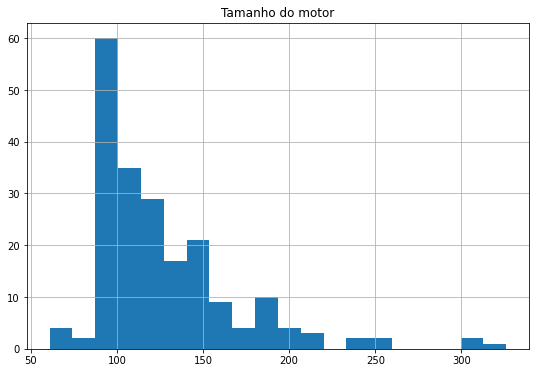

In [62]:
# Visualização do histograma
df.hist(column='Tamanho do motor', figsize=(9,6), bins=20)

## Campo Tipo de injeção

- Sem dados omissos ou inconsistentes

In [63]:
df['Tipo de injeção'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

## Campo Potência (HP)

- Sem dados omissos ou inconsistentes
- Realizada transformação de tipo para float

In [64]:
# Verificação dos dados
df['Potência (HP)'].unique()

array(['111,00', '154,00', '102,00', '115,00', '110,00', '140,00',
       '160,00', '101,00', '121,00', '182,00', '48,00', '70,00', '68,00',
       '88,00', '145,00', '58,00', '76,00', '60,00', '86,00', '100,00',
       '78,00', '90,00', '176,00', '262,00', '135,00', '84,00', '64,00',
       '120,00', '72,00', '123,00', '155,00', '184,00', '175,00',
       '116,00', '69,00', '55,00', '97,00', '152,00', '200,00', '95,00',
       '142,00', '143,00', '207,00', '288,00', '104,26', '73,00', '82,00',
       '94,00', '62,00', '56,00', '112,00', '92,00', '161,00', '156,00',
       '52,00', '85,00', '114,00', '162,00', '134,00', '106,00'],
      dtype=object)

In [65]:
# Transformação dos dados em float
df['Potência (HP)'] = df['Potência (HP)'].astype('string')
df['Potência (HP)'] = df['Potência (HP)'].str.replace(',', '.')
df['Potência (HP)'] = df['Potência (HP)'].astype('float')

In [66]:
# Verificação dos dados
df['Potência (HP)'].unique()

array([111.  , 154.  , 102.  , 115.  , 110.  , 140.  , 160.  , 101.  ,
       121.  , 182.  ,  48.  ,  70.  ,  68.  ,  88.  , 145.  ,  58.  ,
        76.  ,  60.  ,  86.  , 100.  ,  78.  ,  90.  , 176.  , 262.  ,
       135.  ,  84.  ,  64.  , 120.  ,  72.  , 123.  , 155.  , 184.  ,
       175.  , 116.  ,  69.  ,  55.  ,  97.  , 152.  , 200.  ,  95.  ,
       142.  , 143.  , 207.  , 288.  , 104.26,  73.  ,  82.  ,  94.  ,
        62.  ,  56.  , 112.  ,  92.  , 161.  , 156.  ,  52.  ,  85.  ,
       114.  , 162.  , 134.  , 106.  ])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f65eb6a2750>]],
      dtype=object)

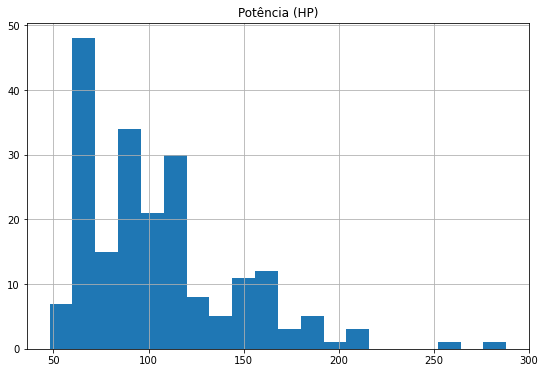

In [67]:
# Visualização do histograma
df.hist(column='Potência (HP)', figsize=(9,6), bins=20)

## Campo Pico RPM

- Com dados inconsistentes
- Realizada a imputação de valores:
  - Registros 10 e 11: verificada ausência de separador de decimal, sendo '5800' o valor mais provável
  - Registros 128 e 129: únicos registros que possuem casas decimais significativas, sendo '5125' o valor utilizado para padronização dos registros
- Realizada transformação de tipo para float

In [68]:
# Verificação dos dados
df['Pico RPM'].unique()

array(['5000,00', '5500,00', 580000, '4250,00', '5400,00', '5100,00',
       '4800,00', '6000,00', '5800,00', '4750,00', '4650,00', '4200,00',
       '4350,00', '4500,00', '5200,00', '4150,00', '5600,00', '5900,00',
       '5750,00', '5125,37', '5250,00', '4900,00', '4400,00', '6600,00',
       '5300,00'], dtype=object)

In [69]:
# Transformação dos dados em float
df['Pico RPM'] = df['Pico RPM'].astype('string')
df['Pico RPM'] = df['Pico RPM'].str.replace(',', '.')
df['Pico RPM'] = df['Pico RPM'].astype('float')

In [70]:
# Verificação dos valores inconsistentes
df[df['Pico RPM'] == 580000]

,Fabricante,Combustível,Portas,Estilo Chassis,Tração,Comprimento,Largura,Altura,Tipo de motor,Número de cilindros,Tamanho do motor,Tipo de injeção,Potência (HP),Pico RPM,Preço
10,bmw,gas,2,sedan,traseira,176.8,64.8,54.3,ohc,4,108.0,mpfi,101.0,580000.0,"16430,00"
11,bmw,gas,4,sedan,traseira,176.8,64.8,54.3,ohc,4,108.0,mpfi,101.0,580000.0,"16925,00"


In [71]:
# Substituição dos valores inconsistentes
df.loc[10:12, 'Pico RPM'] = 5800

In [72]:
# Verificação dos valores inconsistentes
df[df['Pico RPM'] == 5125.37]

,Fabricante,Combustível,Portas,Estilo Chassis,Tração,Comprimento,Largura,Altura,Tipo de motor,Número de cilindros,Tamanho do motor,Tipo de injeção,Potência (HP),Pico RPM,Preço
128,renault,gas,4,suv,dianteira,181.5,66.5,55.2,ohc,4,132.0,mpfi,104.26,5125.37,"9295,00"
129,renault,gas,2,hatch,dianteira,176.8,66.6,50.5,ohc,4,132.0,mpfi,104.26,5125.37,"9895,00"


In [73]:
# Substituição dos valores inconsistentes
df.loc[128:130, 'Pico RPM'] = 5125

In [74]:
# Verificação dos dados
df['Pico RPM'].unique()

array([5000., 5500., 5800., 4250., 5400., 5100., 4800., 6000., 4750.,
       4650., 4200., 4350., 4500., 5200., 4150., 5600., 5900., 5750.,
       5125., 5250., 4900., 4400., 6600., 5300.])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f65eb638b90>]],
      dtype=object)

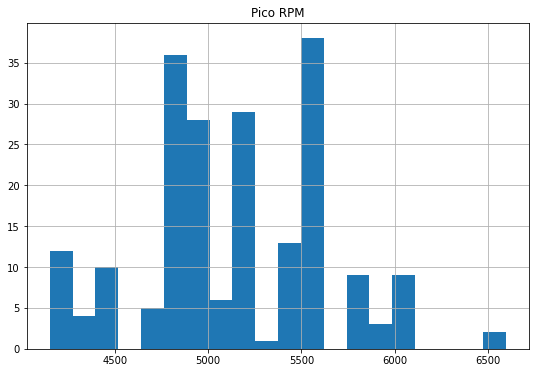

In [75]:
# Visualização do histograma
df.hist(column='Pico RPM', figsize=(9,6), bins=20)

## Campo Preço

- Sem dados omissos ou inconsistentes
- Realizada transformação de tipo para float

In [76]:
# Verificação dos dados
df['Preço'].unique()

array(['13495,00', '16500,00', '13950,00', '17450,00', '15250,00',
       '17710,00', '18920,00', '23875,00', '13207,13', '16430,00',
       '16925,00', '20970,00', '24565,00', '30760,00', '41315,00',
       '36880,00', '5151,00', '6295,00', '6575,00', '5572,00', '6377,00',
       '7957,00', '6229,00', '6692,00', '7609,00', '8558,00', '8921,00',
       '12964,00', '6479,00', '6855,00', '5399,00', '6529,00', '7129,00',
       '7295,00', '7895,00', '9095,00', '8845,00', '10295,00', '12945,00',
       '10345,00', '6785,00', '11048,00', '32250,00', '35550,00',
       '36000,00', '5195,00', '6095,00', '6795,00', '6695,00', '7395,00',
       '11845,00', '13645,00', '15645,00', '8495,00', '10595,00',
       '10245,00', '10795,00', '11245,00', '18280,00', '18344,00',
       '25552,00', '28248,00', '28176,00', '31600,00', '34184,00',
       '35056,00', '40960,00', '45400,00', '16503,00', '5389,00',
       '6189,00', '6669,00', '7689,00', '9959,00', '8499,00', '12629,00',
       '14869,00', '144

In [77]:
# Transformação dos dados em float
df['Preço'] = df['Preço'].astype('string')
df['Preço'] = df['Preço'].str.replace(',', '.')
df['Preço'] = df['Preço'].astype('float')

In [78]:
# Verificação dos dados
df['Preço'].unique()

array([13495.  , 16500.  , 13950.  , 17450.  , 15250.  , 17710.  ,
       18920.  , 23875.  , 13207.13, 16430.  , 16925.  , 20970.  ,
       24565.  , 30760.  , 41315.  , 36880.  ,  5151.  ,  6295.  ,
        6575.  ,  5572.  ,  6377.  ,  7957.  ,  6229.  ,  6692.  ,
        7609.  ,  8558.  ,  8921.  , 12964.  ,  6479.  ,  6855.  ,
        5399.  ,  6529.  ,  7129.  ,  7295.  ,  7895.  ,  9095.  ,
        8845.  , 10295.  , 12945.  , 10345.  ,  6785.  , 11048.  ,
       32250.  , 35550.  , 36000.  ,  5195.  ,  6095.  ,  6795.  ,
        6695.  ,  7395.  , 11845.  , 13645.  , 15645.  ,  8495.  ,
       10595.  , 10245.  , 10795.  , 11245.  , 18280.  , 18344.  ,
       25552.  , 28248.  , 28176.  , 31600.  , 34184.  , 35056.  ,
       40960.  , 45400.  , 16503.  ,  5389.  ,  6189.  ,  6669.  ,
        7689.  ,  9959.  ,  8499.  , 12629.  , 14869.  , 14489.  ,
        6989.  ,  8189.  ,  9279.  ,  5499.  ,  7099.  ,  6649.  ,
        6849.  ,  7349.  ,  7299.  ,  7799.  ,  7499.  ,  7999

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f65eb578a50>]],
      dtype=object)

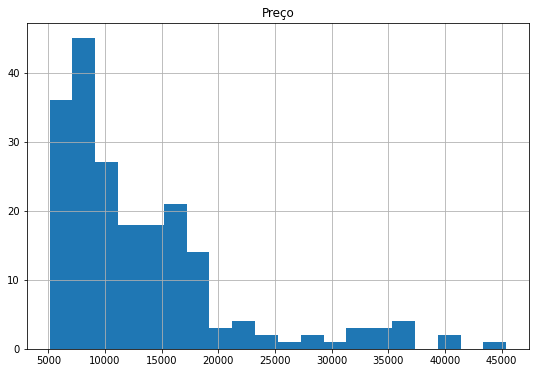

In [79]:
# Visualização do historgrama
df.hist(column='Preço', figsize=(9,6), bins=20)

## Análise final

Como os dados omissos e inconsistentes foram poucos, cada atributo foi analisado indivudualmente e, por meio de técnicas de tratamento, foi possível a preparação da base sem necessidade de remoção de campos ou registros.

In [80]:
# Cabeçalho
df.head(5)

,Fabricante,Combustível,Portas,Estilo Chassis,Tração,Comprimento,Largura,Altura,Tipo de motor,Número de cilindros,Tamanho do motor,Tipo de injeção,Potência (HP),Pico RPM,Preço
0,alfa-romeo,gas,2,conversível,traseira,168.8,64.1,48.8,dohc,4,130.0,mpfi,111.0,5000.0,13495.0
1,alfa-romeo,gas,2,conversível,traseira,168.8,64.1,48.8,dohc,4,130.0,mpfi,111.0,5000.0,16500.0
2,alfa-romeo,gas,2,hatch,traseira,171.2,65.5,52.4,ohcv,6,152.0,mpfi,154.0,5000.0,16500.0
3,audi,gas,4,sedan,dianteira,176.6,66.2,54.3,ohc,4,109.0,mpfi,102.0,5500.0,13950.0
4,audi,gas,4,sedan,4x4,176.6,66.4,54.3,ohc,5,136.0,mpfi,115.0,5500.0,17450.0


In [81]:
# Rodapé
df.tail(5)

,Fabricante,Combustível,Portas,Estilo Chassis,Tração,Comprimento,Largura,Altura,Tipo de motor,Número de cilindros,Tamanho do motor,Tipo de injeção,Potência (HP),Pico RPM,Preço
200,volvo,gas,4,sedan,traseira,188.8,68.9,55.5,ohcv,6,173.0,mpfi,134.0,5500.0,21485.0
201,volvo,diesel,4,sedan,traseira,188.8,68.9,55.5,ohc,6,145.0,idi,106.0,4800.0,22470.0
202,volvo,gas,4,sedan,traseira,188.8,68.9,55.5,ohc,4,141.0,mpfi,114.0,5400.0,22625.0
203,bmw,gas,4,sedan,traseira,176.8,64.8,54.3,ohc,6,164.0,mpfi,121.0,4250.0,21105.0
204,mazda,gas,2,hatch,traseira,169.0,65.7,49.6,rotor,2,70.0,4bbl,101.0,6000.0,10945.0


In [82]:
# Número de linhas e colunas
df.shape

(205, 15)

In [83]:
# Informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Fabricante           205 non-null    object  
 1   Combustível          205 non-null    object  
 2   Portas               205 non-null    category
 3   Estilo Chassis       205 non-null    object  
 4   Tração               205 non-null    object  
 5   Comprimento          205 non-null    float64 
 6   Largura              205 non-null    float64 
 7   Altura               205 non-null    float64 
 8   Tipo de motor        205 non-null    object  
 9   Número de cilindros  205 non-null    int64   
 10  Tamanho do motor     205 non-null    float64 
 11  Tipo de injeção      205 non-null    object  
 12  Potência (HP)        205 non-null    float64 
 13  Pico RPM             205 non-null    float64 
 14  Preço                205 non-null    float64 
dtypes: category(1), float64

In [84]:
# Dados faltantes
df.isnull().sum()

Fabricante             0
Combustível            0
Portas                 0
Estilo Chassis         0
Tração                 0
Comprimento            0
Largura                0
Altura                 0
Tipo de motor          0
Número de cilindros    0
Tamanho do motor       0
Tipo de injeção        0
Potência (HP)          0
Pico RPM               0
Preço                  0
dtype: int64